# A) Experimental Dataset
#### The present investigation utilized the Kaggle EyePACS1 dataset which comprised retina fundus images of high resolution. The dataset came from the California Healthcare Foundation’s Diabetic Retinopathy Detection competition. With great care, ophthalmologists labeled the pictures, classifying them into five distinct groups: ‘normal’, ‘mild’, ‘moderate’, ‘severe’, and ‘proliferative’ diabetic retinopathy. The dataset includes 35,126 fundus photos in total.

In [2]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
# function to load image paths from a directory
def load_image_paths(directory):
    # getting all image file paths from the directory
    supported_formats = ('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.tiff')
    image_paths = [os.path.join(directory, file) for file in os.listdir(directory) 
                   if file.lower().endswith(supported_formats)]
    return image_paths
image_paths = load_image_paths('./dataset')
image_paths[:5]

['./dataset\\10003_left.jpeg',
 './dataset\\10003_right.jpeg',
 './dataset\\10007_left.jpeg',
 './dataset\\10007_right.jpeg',
 './dataset\\10009_left.jpeg']

# B) Dataset Preprocessing
#### The EyePACS dataset includes a wide variety of retinal images taken with cameras of different sizes and different lighting conditions. In order to reduce the resulting differences, the images were normalized through a number of preprocessing steps. The fundus images of the eye are shown in Figure are in their original state prior to the application of these preprocessing steps.

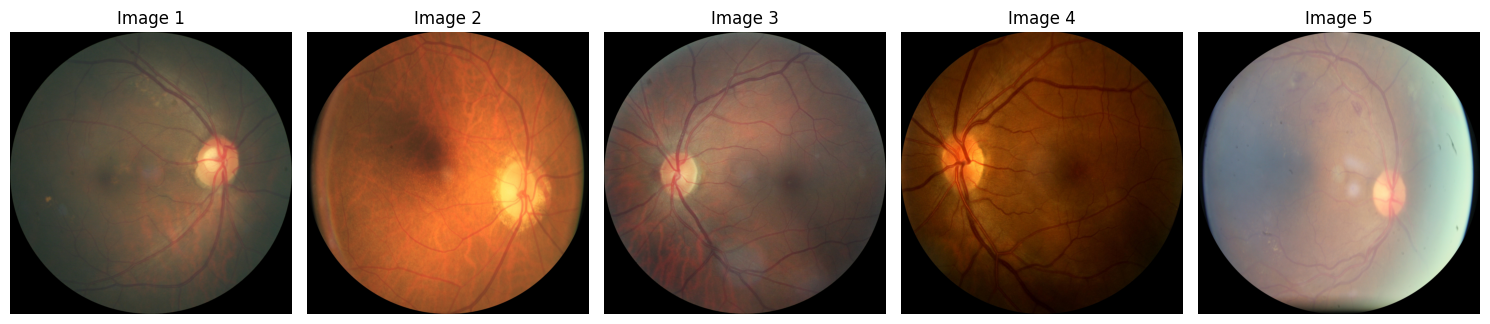

In [4]:
# function to display a few random images
def display_random_images(image_paths, num_images = 5):
    # selecting random images
    selected_images = random.sample(image_paths,min(num_images,len(image_paths)))

    # Plotting the selected images
    plt.figure(figsize=(15,5))
    for i, image_path in enumerate(selected_images):
        img = Image.open(image_path)
        plt.subplot(1, len(selected_images),i+1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f'Image {i+1}')
    plt.tight_layout()
    plt.show()

# Loading the paths and display random images
image_paths = load_image_paths('./dataset')
if image_paths:
    display_random_images(image_paths,num_images=5)
else:
    print("No Images Found in the Specified Directory")

#plt.imshow(Image.open('./dataset\\10003_left.jpeg'))

# Resizing
#### Resizing is an important step when preparing fundus images for diabetic retinopathy analysis. Bicubic interpolation is a popular method used for this. It works by calculating the average of nearby pixels, giving more weight to closer ones. This method is preferred because it produces smooth and clear images, with fewer distortions or artifacts, making them look better and more accurate for analysis.

In [ ]:
input_folder = 'dataset/'
output_folder = 'resized_dataset/'

# Creating the output folder if it does not exist
os.makedirs(output_folder, exist_ok=True)

# Define new dimensions for resizing
new_width, new_height = 224,224

# Processing each Image in the dataset
for filename in os.listdir(input_folder):
    input_path = os.path.join(input_folder, filename)
    output_path = os.path.join(output_folder, filename)

    # Check if the image already exists in the output folder
    if os.path.exists(output_path):
        print(f'Skipped {filename}, already exists in the output folder.')
        continue 

    try:
        #open the image
        with Image.open(input_path) as image:
            # Resize using bicubic interpolation
            resized_image = image.resize((new_width, new_height), Image.Resampling.BICUBIC)
            # Save the resized image
            resized_image.save(output_path)
            print(f'Resized and saved:{output_path}')
    except Exception as e:
        print(f'Failed to Process {filename}: {e}')

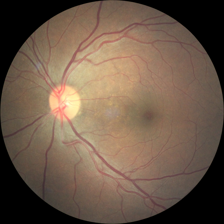

In [7]:
# Performing Bicubic Interpolation on a single Image
image = Image.open('./dataset\\10003_left.jpeg')
new_width, new_height = 224, 224
resized_image = image.resize((new_width, new_height), Image.Resampling.BICUBIC)
resized_image

# Green Channel Extraction
#### The dataset images of the retina exhibit a variety of large, yellowish tones against a dark background. To reduce interference, especially since fundus details do not overlap with the background, the background was removed. After image resizing, a green channel is obtained from the images. The retinal images are traditionally low resolution and low contrast and various types of diabetic retinopathy are visible in the green channel. It is easy to detect diabetic retinopathy in green channel images due to high contrast. The green channel extraction step of preprocessing aims to enhance the image contrast.Below Figure shows the output of green channel extraction of retinal images.

In [ ]:
import numpy as np
input_dir = "resized_dataset/"

# Processing each Image in the directory
for filename in os.listdir(input_dir):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff', '.webp')):
        # Full path to the input Image
        input_path = os.path.join(input_dir, filename)
        try:
            # open the image
            image = Image.open(input_path)
            # converting the image to a Numpy array
            image_array = np.array(image)
            # ensuring the image has 3 or more channels
            if image_array.ndim < 3 or image_array.shape[2] < 3:
                print(f"Skipping {filename}: Image Does not have enough Channel")
                continue

            # Extracting the green channel
            green_channel = image_array[:,:,1]

            # Convert the green channel back to an image
            green_image = Image.fromarray(green_channel)

            # Overwrite the orginal image with the green channel image
            green_image.save(input_path)
            print(f"Processed and replaced: {input_path}")
        except Exception as e:
            print(f"Error processing {filename}: {e}")

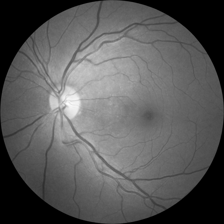

In [9]:
import numpy as np 
resized_image_array = np.array(resized_image)
green_channel = resized_image_array[:,:,1]
green_image = Image.fromarray(green_channel)
green_image

# TopHat and BottomHat Transformations
#### Morphological operations are like the unsung heroes of image processing, right? Opening and closing, in particular, are like the dynamic duo in pre-processing diabetic retinopathy fundus images. They can really help fine-tune the details and enhance the features in the images, contributing to a more effective analysis. These operations are instrumental in noise reduction, contrast enhancement, and highlighting specific image features. Tophat and bottom hat transformations are commonly employed morphological changes in this context.Below Figure provides a visual representation of the fundus images after undergoing these morphological operations.

In [ ]:
from PIL import ImageFilter
input_directory = 'resized_dataset/'

# Looping through all the images in the folder 
for filename in os.listdir(input_directory):
    if filename.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff', '.webp')):
        image_path = os.path.join(input_directory, filename)

        # Open the Image
        img = Image.open(image_path)

        # Perform Top Hat and Bottom Hat Transformations
        top_hat = img.filter(ImageFilter.MinFilter(3))
        bottom_hat = img.filter(ImageFilter.MaxFilter(3))
        top_hat.save(os.path.join(input_directory, f"top_hat_{filename}"))
        bottom_hat.save(os.path.join(input_directory, f"bottom_hat_{filename}"))
        print(f"Saved: {filename}")

In [ ]:
input_directory = 'resized_dataset/'

# Looping through all the images in the folder
for filename in os.listdir(input_directory):
    if filename.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff', '.webp')):
        image_path = os.path.join(input_directory, filename)

        # Check if the transformed images (top_hat_ and bottom_hat_ prefixed images) exist
        top_hat_path = os.path.join(input_directory, f"top_hat_{filename}")
        bottom_hat_path = os.path.join(input_directory, f"bottom_hat_{filename}")

        # Ensure both transformed images exist before removing the original
        if os.path.exists(top_hat_path) and os.path.exists(bottom_hat_path):
            os.remove(image_path)  # Remove the original image
            print(f"Removed: {filename}")
        else:
            print(f"Skipping: {filename} (Transformed images not found)")

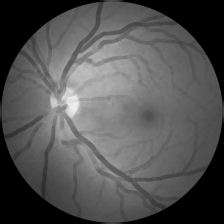

In [20]:
from PIL import ImageFilter
top_hat = green_image.filter(ImageFilter.MinFilter(3))
bottom_hat = green_image.filter(ImageFilter.MaxFilter(3))
top_hat

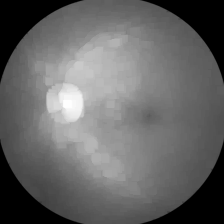

In [19]:
bottom_hat

In [1]:
top_hat

NameError: name 'top_hat' is not defined

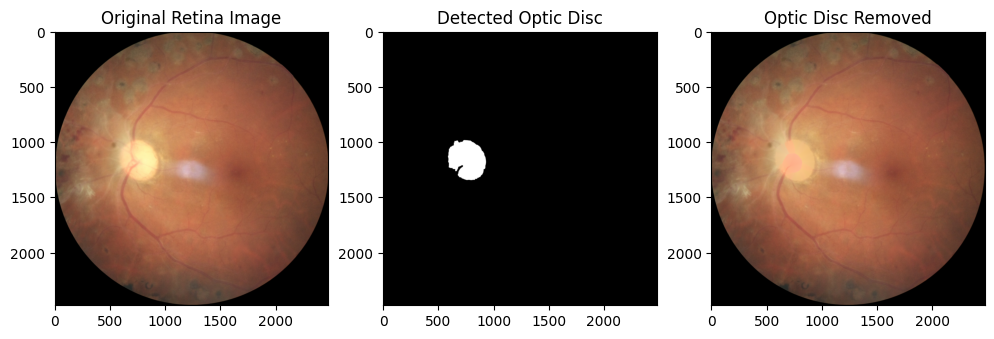

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load Retina Image
image = cv2.imread("294_left.jpeg")  # Replace with your image path
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur to Reduce Noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Thresholding for Optic Disc Extraction
_, thresh = cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY)

# Morphological Operations (Open-Close)
kernel = np.ones((7, 7), np.uint8)
opened = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
closed = cv2.morphologyEx(opened, cv2.MORPH_CLOSE, kernel, iterations=2)

# Distance Transform & Watershed
dist_transform = cv2.distanceTransform(closed, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Finding Markers
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(closed, sure_fg)
_, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0

# Apply Watershed
image_watershed = image.copy()
cv2.watershed(image_watershed, markers)
image_watershed[markers == -1] = [0, 0, 255]  # Mark boundaries in red

# Inpainting to Remove Optic Disc
inpainted = cv2.inpaint(image, closed, inpaintRadius=5, flags=cv2.INPAINT_TELEA)

# Display Results
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title("Original Retina Image")
plt.subplot(1, 3, 2), plt.imshow(closed, cmap='gray'), plt.title("Detected Optic Disc")
plt.subplot(1, 3, 3), plt.imshow(cv2.cvtColor(inpainted, cv2.COLOR_BGR2RGB)), plt.title("Optic Disc Removed")
plt.show()


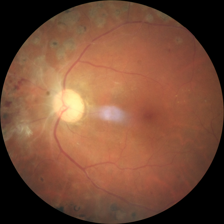

In [3]:
# Performing Bicubic Interpolation on a single Image
from PIL import Image
image = Image.open('294_left.jpeg')
new_width, new_height = 224, 224
resized_image = image.resize((new_width, new_height), Image.Resampling.BICUBIC)
resized_image

In [15]:
import numpy as np 
resized_image_array = np.array(resized_image)
green_channel = resized_image_array[:,:,1]
green_image = Image.fromarray(green_channel)
green_image
green_image_np = np.array(green_image)
cv2.imwrite("output.png", green_image_np)

AttributeError: 'numpy.ndarray' object has no attribute 'filter'

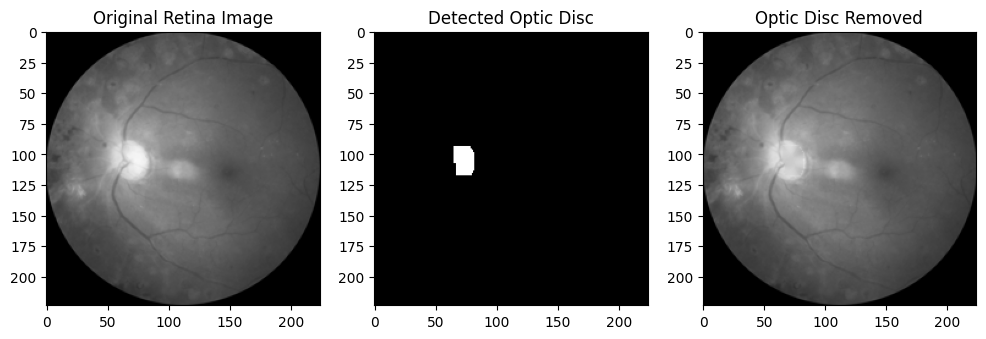

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load Retina Image
image = cv2.imread("output.png")  # Replace with your image path
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur to Reduce Noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Thresholding for Optic Disc Extraction
_, thresh = cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY)

# Morphological Operations (Open-Close)
kernel = np.ones((7, 7), np.uint8)
opened = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
closed = cv2.morphologyEx(opened, cv2.MORPH_CLOSE, kernel, iterations=2)

# Distance Transform & Watershed
dist_transform = cv2.distanceTransform(closed, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Finding Markers
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(closed, sure_fg)
_, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0

# Apply Watershed
image_watershed = image.copy()
cv2.watershed(image_watershed, markers)
image_watershed[markers == -1] = [0, 0, 255]  # Mark boundaries in red

# Inpainting to Remove Optic Disc
inpainted = cv2.inpaint(image, closed, inpaintRadius=5, flags=cv2.INPAINT_TELEA)

# Display Results
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title("Original Retina Image")
plt.subplot(1, 3, 2), plt.imshow(closed, cmap='gray'), plt.title("Detected Optic Disc")
plt.subplot(1, 3, 3), plt.imshow(cv2.cvtColor(inpainted, cv2.COLOR_BGR2RGB)), plt.title("Optic Disc Removed")
plt.show()


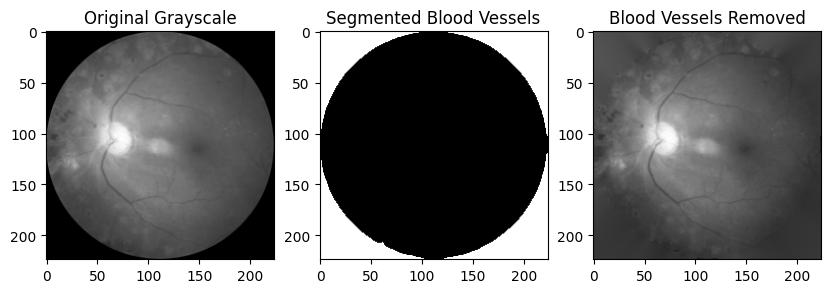

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the retina image
image = cv2.imread("output.png")  # Replace with your image path
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply Otsu's Thresholding to segment blood vessels
_, thresholded = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Optional: Use morphological operations to refine the mask
kernel = np.ones((3,3), np.uint8)
cleaned_mask = cv2.morphologyEx(thresholded, cv2.MORPH_CLOSE, kernel, iterations=2)

# Remove blood vessels by subtracting the mask
vessel_removed = cv2.inpaint(gray, cleaned_mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

# Display results
plt.figure(figsize=(10,5))
plt.subplot(1,3,1), plt.imshow(gray, cmap='gray'), plt.title("Original Grayscale")
plt.subplot(1,3,2), plt.imshow(cleaned_mask, cmap='gray'), plt.title("Segmented Blood Vessels")
plt.subplot(1,3,3), plt.imshow(vessel_removed, cmap='gray'), plt.title("Blood Vessels Removed")
plt.show()


In [14]:
from PIL import ImageFilter
top_hat = vessel_removed.filter(ImageFilter.MinFilter(3))
bottom_hat = vessel_removed.filter(ImageFilter.MaxFilter(3))
top_hat

AttributeError: 'numpy.ndarray' object has no attribute 'filter'

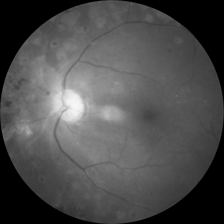

In [16]:
import numpy as np 
resized_image_array = np.array(resized_image)
green_channel = resized_image_array[:,:,1]
green_image_2 = Image.fromarray(green_channel)
green_image_2

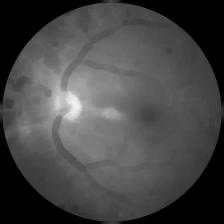

In [22]:
from PIL import ImageFilter
top_hat = green_image_2.filter(ImageFilter.MinFilter(5))
bottom_hat = green_image_2.filter(ImageFilter.MaxFilter(5))
top_hat

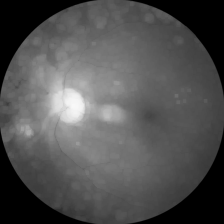

In [18]:
bottom_hat